In [134]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
print(tf.__version__)

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-x2hbpwie
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-x2hbpwie
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.064b684b2a78efa0b0b9fff43b04c18fc1ffed442_-cp36-none-any.whl size=114636 sha256=ce3f0d3344d8d86e684786e76c1816b517382db6fbe58a08bf88bb06a002aa40
  Stored in directory: /tmp/pip-ephem-wheel-cache-l79ftxar/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
2.2.0


In [135]:
df = pd.read_csv("products.csv")
df_c = pd.read_csv("categories.csv")
df.head()

,ID,Category_ID,Name,Name_subtitle,Keywords,Pantry_Min,Pantry_Max,Pantry_Metric,Pantry_tips,DOP_Pantry_Min,DOP_Pantry_Max,DOP_Pantry_Metric,DOP_Pantry_tips,Pantry_After_Opening_Min,Pantry_After_Opening_Max,Pantry_After_Opening_Metric,Refrigerate_Min,Refrigerate_Max,Refrigerate_Metric,Refrigerate_tips,DOP_Refrigerate_Min,DOP_Refrigerate_Max,DOP_Refrigerate_Metric,DOP_Refrigerate_tips,Refrigerate_After_Opening_Min,Refrigerate_After_Opening_Max,Refrigerate_After_Opening_Metric,Refrigerate_After_Thawing_Min,Refrigerate_After_Thawing_Max,Refrigerate_After_Thawing_Metric,Freeze_Min,Freeze_Max,Freeze_Metric,Freeze_Tips,DOP_Freeze_Min,DOP_Freeze_Max,DOP_Freeze_Metric,DOP_Freeze_Tips
0,1,7,Butter,NaN,Butter,NaN,NaN,NaN,May be left at room temperature for 1 - 2 days.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,9.0,Months,NaN
1,2,7,Buttermilk,NaN,Buttermilk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,Weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,Months,NaN
2,3,7,Cheese,"hard such as cheddar, swiss, block parmesan","Cheese,cheddar, swiss,parmesan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,Months,NaN,3.0,4.0,Weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,Months,NaN
3,4,7,Cheese,parmesan; shredded or grated,"Cheese,parmesan,shredded,grated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recommended,NaN,NaN,NaN,NaN,NaN
4,5,7,Cheese,"shredded; cheddar, mozzarella, etc.","Cheese,shredded,cheddar,mozzarella",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,Months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,Months,NaN


In [0]:
df_f = df[['Category_ID','DOP_Refrigerate_Min','DOP_Refrigerate_Max','DOP_Refrigerate_Metric']]


In [137]:
df_f.head()

,Category_ID,DOP_Refrigerate_Min,DOP_Refrigerate_Max,DOP_Refrigerate_Metric
0,7,1.0,2.0,Months
1,7,1.0,2.0,Weeks
2,7,6.0,6.0,Months
3,7,12.0,12.0,Months
4,7,1.0,1.0,Months


In [138]:
df_f["mean_days"] = df_f[['DOP_Refrigerate_Max','DOP_Refrigerate_Min']].mean(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
len(df_f)

661

In [0]:
df_f = df_f.dropna()

In [141]:
df_f['DOP_Refrigerate_Metric'].unique()

array(['Months', 'Weeks', 'Days', 'Years'], dtype=object)

In [142]:
mappings = {"Months":30,"Weeks":7,"Days":1,"Years":365}
df_f.DOP_Refrigerate_Metric.replace(mappings,inplace=True)
df_f.head()

,Category_ID,DOP_Refrigerate_Min,DOP_Refrigerate_Max,DOP_Refrigerate_Metric,mean_days
0,7,1.0,2.0,30,1.5
1,7,1.0,2.0,7,1.5
2,7,6.0,6.0,30,6.0
3,7,12.0,12.0,30,12.0
4,7,1.0,1.0,30,1.0


In [0]:
df_f['mean_days'] = df_f['mean_days']*df_f['DOP_Refrigerate_Metric']

In [144]:
df_f.head()

,Category_ID,DOP_Refrigerate_Min,DOP_Refrigerate_Max,DOP_Refrigerate_Metric,mean_days
0,7,1.0,2.0,30,45.0
1,7,1.0,2.0,7,10.5
2,7,6.0,6.0,30,180.0
3,7,12.0,12.0,30,360.0
4,7,1.0,1.0,30,30.0


In [0]:
df_f = df_f[['Category_ID','mean_days']]

In [0]:
df_f['Category_ID'] = df['Category_ID'].astype('category',copy=False)
df_f = pd.get_dummies(df_f)

In [147]:
df_f.columns

Index(['mean_days', 'Category_ID_1', 'Category_ID_2', 'Category_ID_3',
       'Category_ID_4', 'Category_ID_5', 'Category_ID_6', 'Category_ID_7',
       'Category_ID_8', 'Category_ID_9', 'Category_ID_10', 'Category_ID_11',
       'Category_ID_12', 'Category_ID_13', 'Category_ID_14', 'Category_ID_15',
       'Category_ID_16', 'Category_ID_17', 'Category_ID_18', 'Category_ID_19',
       'Category_ID_20', 'Category_ID_21', 'Category_ID_22', 'Category_ID_23',
       'Category_ID_24', 'Category_ID_25'],
      dtype='object')

In [148]:
df_f.head()

,mean_days,Category_ID_1,Category_ID_2,Category_ID_3,Category_ID_4,Category_ID_5,Category_ID_6,Category_ID_7,Category_ID_8,Category_ID_9,Category_ID_10,Category_ID_11,Category_ID_12,Category_ID_13,Category_ID_14,Category_ID_15,Category_ID_16,Category_ID_17,Category_ID_18,Category_ID_19,Category_ID_20,Category_ID_21,Category_ID_22,Category_ID_23,Category_ID_24,Category_ID_25
0,45.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,360.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


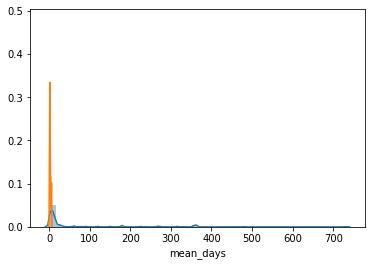

In [150]:
sns.distplot(df_f['mean_days'])
target = np.log(df_f['mean_days'])
sns.distplot(target)

In [0]:
Y = df_f['mean_days']
df_x = df_f
del df_x['mean_days']


In [0]:
x_train,x_test,y_train,y_test = train_test_split(df_x,Y,test_size=0.3,random_state = 42)

In [153]:
print(len(x_train))

164


In [154]:
print(len(x_test))

71


In [0]:
def build_model(l):
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[l]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model(len(df_x.columns))

In [157]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1664      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [158]:
EPOCHS = 10

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/10
1/5 [=====>........................] - ETA: 0s - loss: 9881.3037 - mae: 40.0048 - mse: 9881.3037
Epoch: 0, loss:11336.8154,  mae:44.1313,  mse:11336.8154,  val_loss:36964.2109,  val_mae:93.5494,  val_mse:36964.2109,  
5/5 [==============================] - 0s 23ms/step - loss: 11336.8154 - mae: 44.1313 - mse: 11336.8154 - val_loss: 36964.2109 - val_mae: 93.5494 - val_mse: 36964.2109
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 11315.1230 - mae: 43.8773 - mse: 11315.1230 - val_loss: 36929.0117 - val_mae: 93.3442 - val_mse: 36929.0117
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 11295.3740 - mae: 43.6645 - mse: 11295.3740 - val_loss: 36886.6484 - val_mae: 93.0983 - val_mse: 36886.6484
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 11271.3193 - mae: 43.4100 - mse: 11271.3193 - val_loss: 36835.9570 - val_mae: 92.8120 - val_mse: 36835.9570
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss:

In [0]:
test_predictions = model.predict(x_test).flatten()

In [160]:
print(test_predictions)

[2.687687  2.9525425 2.8039129 2.8517563 1.5965692 2.8601928 3.0893
 2.1488283 2.5687501 2.8517563 2.5687501 3.2486565 2.8517563 3.2486565
 3.0893    2.9525425 2.8517563 1.6988145 2.5687501 3.2486565 3.0893
 2.8517563 2.1488283 2.9525425 2.8039129 3.2486565 2.687687  2.8039129
 2.687687  2.8517563 2.952542  3.2486565 3.2486565 2.9525425 1.5965692
 2.8039129 2.8039129 2.8517563 2.8039129 2.8039129 2.8039129 2.9525425
 1.5965692 3.2486565 3.0893    2.8039129 2.687687  1.6988145 2.8039129
 2.9525425 2.8039129 2.8039129 2.8039129 3.0893    2.8601928 2.1488283
 2.8039129 2.687687  3.2486565 2.1488283 2.8039129 2.8039129 2.8601925
 2.56875   2.687687  3.0814297 1.6988145 2.687687  2.687687  3.2486565
 1.6988145]


In [161]:
x_test.head()

,Category_ID_1,Category_ID_2,Category_ID_3,Category_ID_4,Category_ID_5,Category_ID_6,Category_ID_7,Category_ID_8,Category_ID_9,Category_ID_10,Category_ID_11,Category_ID_12,Category_ID_13,Category_ID_14,Category_ID_15,Category_ID_16,Category_ID_17,Category_ID_18,Category_ID_19,Category_ID_20,Category_ID_21,Category_ID_22,Category_ID_23,Category_ID_24,Category_ID_25
76,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [163]:
model.save('regression')

INFO:tensorflow:Assets written to: regression/assets


In [164]:
!zip -r /regression.zip regression

  adding: regression/ (stored 0%)
  adding: regression/variables/ (stored 0%)
  adding: regression/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: regression/variables/variables.index (deflated 64%)
  adding: regression/assets/ (stored 0%)
  adding: regression/saved_model.pb (deflated 88%)


In [0]:
from google.colab import files
files.download("/regression.zip")